In [54]:
# EMPeaksをインポートする
import sys
sys.path.append(R"C:\Users\nauli\Documents\Python Projects\Analysis")

In [56]:
%matplotlib inline
from EMPeaks import LorentzianMixture
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

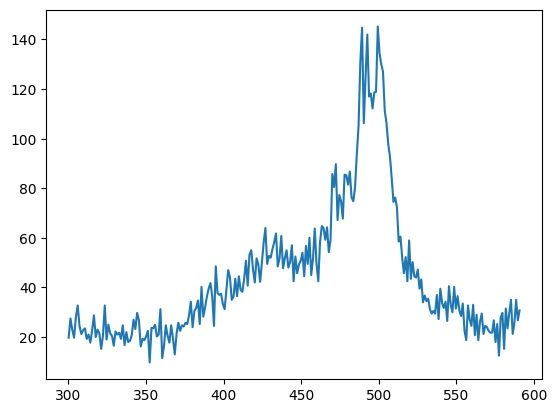

In [72]:
Raman = pd.read_csv('Raman.txt', delimiter='\t')
plt.plot(Raman['Wave'],Raman['Int'])

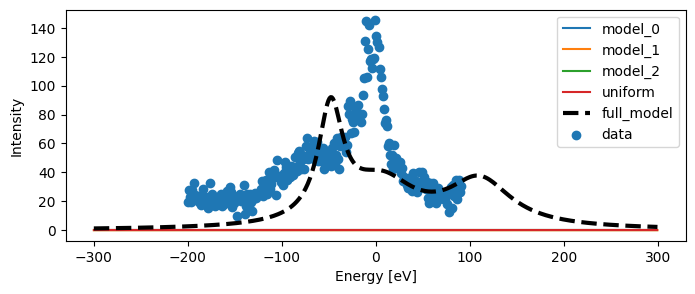

In [73]:
# 現状Gaussian以外は横軸が[-300,300]から著しく外れているとうまくフィッティングできないので
# 横軸の中心が大体0になるように横軸をシフトさせる必要がある。
shift = 500
Raman['Wave']=Raman['Wave']-shift
#Kは決め打ちするピークの本数。backgroundでバックグラウンド関数を指定。
lmm = LorentzianMixture.LorentzianMixtureModel(K=3, background="uniform")
lmm.N_tot = sum(Raman['Int'])
lmm.plot(Raman['Wave'],Raman['Int'])

* Starting Trial #   0
<< Start fitting via Adapted EM Algorithm. >>
Convergence is achieved at iter. 128, elapsed time  5.16 s
   LogLikelihood:     -6.24541214e+04
        residual:      9.86004082e-09
<< Optimizing normalization factor by using least square method. >>
init 12788.008051199999
   non-linear least-square optimization is successfully finished.
            RMSE:      6.812293e+00
    Elapsed time:      3.714085e-03 s

* Starting Trial #   1
<< Start fitting via Adapted EM Algorithm. >>
Convergence is achieved at iter. 223, elapsed time  8.40 s
   LogLikelihood:     -6.24546694e+04
        residual:      9.86451073e-09
<< Optimizing normalization factor by using least square method. >>
init 12788.008051199999
   non-linear least-square optimization is successfully finished.
            RMSE:      6.934617e+00
    Elapsed time:      0.000000e+00 s

* Starting Trial #   2
<< Start fitting via Adapted EM Algorithm. >>
Convergence is achieved at iter. 390, elapsed time 15.51 

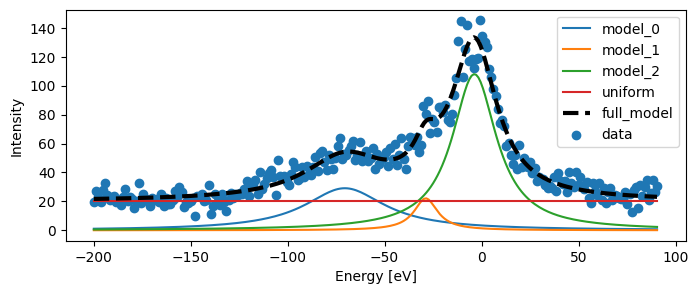

In [76]:
#5回の初期パラメータサンプリングのあとに得られた最適なモデルをプロットします。
lmm.sampling(Raman['Wave'],Raman['Int'],trial=5, r_eps=1e-8)
lmm.plot(Raman['Wave'],Raman['Int'])